# 사진유사도 비교서비스 mediapipe 안면인식인증
* 두개의 유사한 사진 유사도 측정하는 코드
* 이미지 임베딩 :
MediaPipe 이미지 임베더 작업을 통해 이미지의 숫자 표현을 만들 수 있으며, 이는 다양한 ML 기반 이미지 작업을 수행하는 데 유용합니다. 이 기능은 코사인 유사성과 같은 수학적 비교 기술을 사용하여 두 이미지의 유사성을 비교하는 데 자주 사용됩니다. 이 작업은 머신 러닝(ML) 모델을 정적 데이터 또는 연속 스트림으로 사용하는 이미지 데이터에서 작동하며, 이미지 데이터의 숫자 표현을 플로팅 포인트 또는 양자화된 형태로 임베딩 벡터라고도 하는 고차원 특징 벡터 목록으로 출력합니다.

https://ai.google.dev/edge/mediapipe/solutions/vision/image_embedder?hl=ko

### MediaPipe 작업을 사용한 이미지 임베딩
이 노트북은 MediaPipe Tasks Python API를 사용하여 두 개의 별도 이미지 파일을 비교하여 얼마나 유사한지 확인하는 방법을 보여줍니다. 이러한 값은 -1에서 1까지이며 1은 동일한 이미지입니다. 이는 코사인 유사성이라는 기술을 통해 수행됩니다.

In [3]:
# title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [11]:
# 필요한 라이브러리 설치

# !pip install mediapipe

In [10]:
# 필요한 라이브러리 설치

#!pip install ipywidgets

In [11]:
import gradio as gr
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import urllib.request

In [12]:
# MediaPipe Image Embedder 설정
def get_embedder():
    model_url = 'https://storage.googleapis.com/mediapipe-models/image_embedder/mobilenet_v3_small/float32/1/mobilenet_v3_small.tflite'
    model_path = 'mobilenet_v3_small.tflite'
    urllib.request.urlretrieve(model_url, model_path)
    
    base_options = python.BaseOptions(model_asset_path=model_path)
    options = vision.ImageEmbedderOptions(
        base_options=base_options, l2_normalize=True, quantize=True
    )
    embedder = vision.ImageEmbedder.create_from_options(options)
    return embedder

In [13]:
# 두 이미지의 코사인 유사도를 계산하는 함수
def calculate_similarity(image1, image2):
    embedder = get_embedder()
    
    # 이미지 포맷 변환 및 임베딩
    mp_image1 = mp.Image(image_format=mp.ImageFormat.SRGB, data=image1)
    mp_image2 = mp.Image(image_format=mp.ImageFormat.SRGB, data=image2)

    embedding1 = embedder.embed(mp_image1)
    embedding2 = embedder.embed(mp_image2)

    # 코사인 유사도 계산
    similarity = vision.ImageEmbedder.cosine_similarity(
        embedding1.embeddings[0],
        embedding2.embeddings[0]
    )
    
    return f"코사인 유사도: {similarity}"

In [17]:
# Gradio 인터페이스 함수
def process_images(image1, image2):
    # OpenCV 형식으로 이미지를 읽어 numpy 배열로 변환
    image1_np = np.array(image1)
    image2_np = np.array(image2)
    
    # 유사도 계산
    return calculate_similarity(image1_np, image2_np)

# Gradio 앱 구성
with gr.Blocks() as app:
    gr.Markdown("# Image Similarity using MediaPipe")

    with gr.Tab("Upload two images"):
        with gr.Row():
            image1 = gr.Image(label="Upload first image")
            image2 = gr.Image(label="Upload second image")
        output = gr.Textbox(label="Similarity Score")
        compare_btn = gr.Button("Compare")
        compare_btn.click(fn=process_images, inputs=[image1, image2], outputs=output)

# Gradio 앱 실행
app.launch(inline=False, share=True)

Running on local URL:  http://127.0.0.1:7863
IMPORTANT: You are using gradio version 3.40.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://7ab72d2d0627e24026.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


I0000 00:00:1727154145.330989   77217 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1727154145.362134   77309 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: D3D12 (AMD Radeon(TM) Graphics)
/home/user/miniforge3/envs/torch/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [16]:
app.close()

Closing server running on port: 7863


## 결과

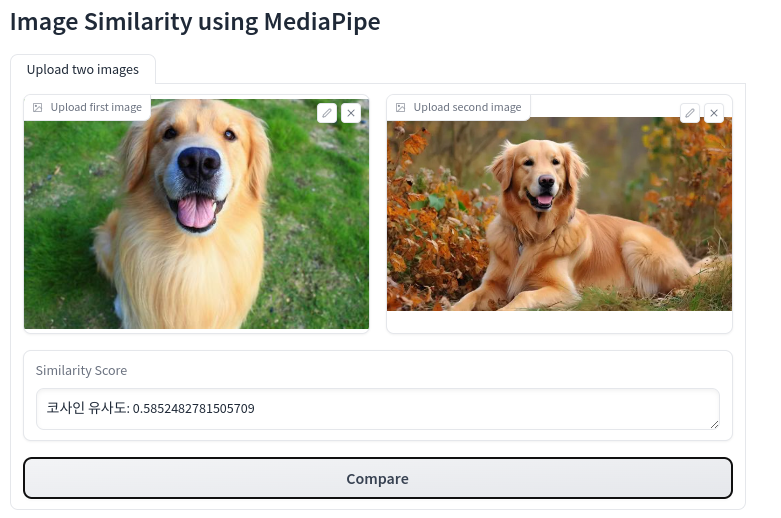

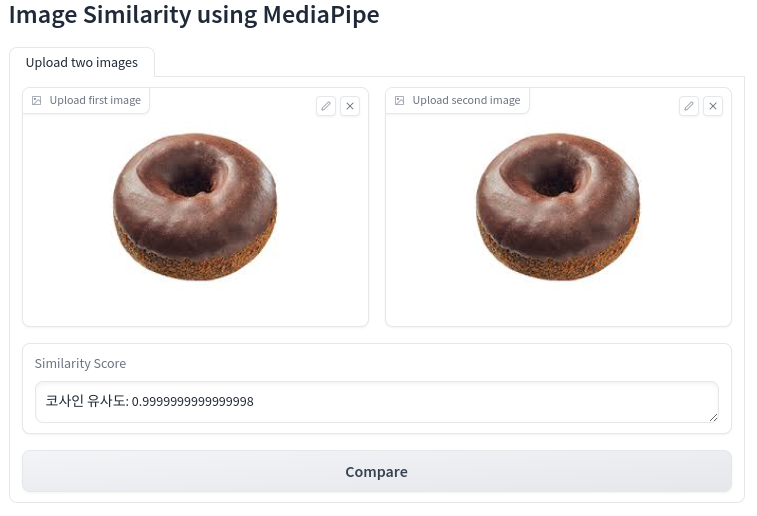